<a href="https://colab.research.google.com/github/BRamya14/Reinforcement-Learning/blob/main/Copy_of_Randomwalk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Random Series

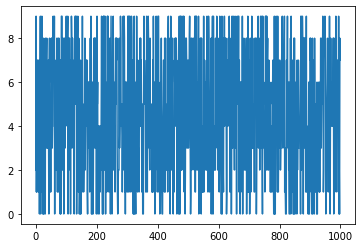

In [ ]:
from random import seed
from random import randrange
from matplotlib import pyplot
seed(1)
series = [randrange(10) for i in range(1000)]
pyplot.plot(series)
pyplot.show()

RandomWalk creation

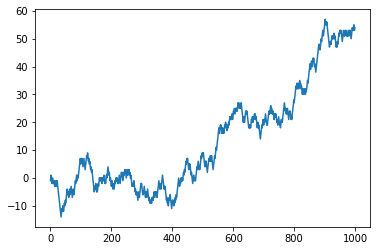

In [ ]:
from random import seed
from random import random
from matplotlib import pyplot
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)
pyplot.plot(random_walk)
pyplot.show()

Auto Correlation

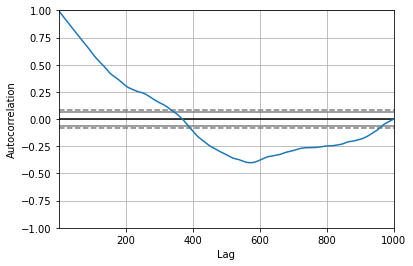

In [ ]:
from random import seed
from random import random
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
	movement = -1 if random() < 0.5 else 1
	value = random_walk[i-1] + movement
	random_walk.append(value)
autocorrelation_plot(random_walk)
pyplot.show()

Stationarity

In [ ]:
from random import seed
from random import random
from statsmodels.tsa.stattools import adfuller
# generate random walk
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
	movement = -1 if random() < 0.5 else 1
	value = random_walk[i-1] + movement
	random_walk.append(value)
# statistical test
result = adfuller(random_walk)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.341605
p-value: 0.979175
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


Converting Non-Stationary to Stationary

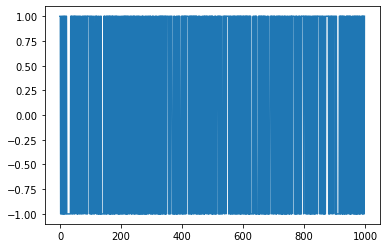

In [ ]:
from random import seed
from random import random
from matplotlib import pyplot
# create random walk
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
	movement = -1 if random() < 0.5 else 1
	value = random_walk[i-1] + movement
	random_walk.append(value)
# take difference
diff = list()
for i in range(1, len(random_walk)):
	value = random_walk[i] - random_walk[i - 1]
	diff.append(value)
# line plot
pyplot.plot(diff)
pyplot.show()

Auto Correlation

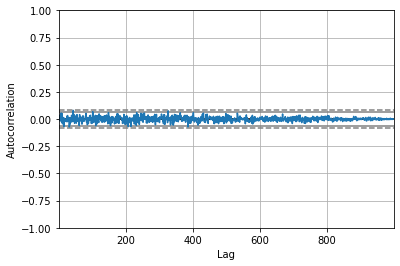

In [ ]:
from random import seed
from random import random
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
# create random walk
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
	movement = -1 if random() < 0.5 else 1
	value = random_walk[i-1] + movement
	random_walk.append(value)
# take difference
diff = list()
for i in range(1, len(random_walk)):
	value = random_walk[i] - random_walk[i - 1]
	diff.append(value)
# line plot
autocorrelation_plot(diff)
pyplot.show()

predicting RandomWalk

In [ ]:
from random import seed
from random import random
from sklearn.metrics import mean_squared_error
# generate the random walk
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
	movement = -1 if random() < 0.5 else 1
	value = random_walk[i-1] + movement
	random_walk.append(value)
# prepare dataset
train_size = int(len(random_walk) * 0.66)
train, test = random_walk[0:train_size], random_walk[train_size:]
# persistence
predictions = list()
history = train[-1]
for i in range(len(test)):
	yhat = history
	predictions.append(yhat)
	history = test[i]
error = mean_squared_error(test, predictions)
print('Persistence MSE: %.3f' % error)

Persistence MSE: 1.000


identifying best method for prediction

In [ ]:
from random import seed
from random import random
from sklearn.metrics import mean_squared_error
# generate the random walk
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
	movement = -1 if random() < 0.5 else 1
	value = random_walk[i-1] + movement
	random_walk.append(value)
# prepare dataset
train_size = int(len(random_walk) * 0.66)
train, test = random_walk[0:train_size], random_walk[train_size:]
# random prediction
predictions = list()
history = train[-1]
for i in range(len(test)):
	yhat = history + (-1 if random() < 0.5 else 1)
	predictions.append(yhat)
	history = test[i]
error = mean_squared_error(test, predictions)
print('Random MSE: %.3f' % error)

Random MSE: 1.765
